环境: 用VSCode连接实验室的远程存储服务器, 并完成环境配置

In [3]:
import pymongo
import re
import matplotlib.pyplot as plt

db = pymongo.MongoClient('mongodb://127.0.0.1:27017')['radar']
col = db['package_repository_url']

Libraries.io的优势, 支持多个平台，比如gitlab、bitbucket

统计能够被Libraries.io识别的包中, 各代码托管平台的数目

In [4]:
docs = col.find()

lib_platform_counts = {}
lib_platform_counts['null'] = 0

platform_keywords = ["android.googlesource", "git-wip-us.apache", \
    "git-wip-us.apache", "gitbox.apache", "svn.apache", "bitbucket",\
        "git.drupalcode",  "git.eclipse", "github", "gitlab", "sourceforge"]

for doc in docs:
    url = doc["Libraries.io"]
    if isinstance(url, str):
        for keyword in platform_keywords:
            if re.search(keyword, url):
                if keyword in lib_platform_counts:
                    lib_platform_counts[keyword] += 1
                else:
                    lib_platform_counts[keyword] = 1
    lib_platform_counts['null'] += 1
    
print(lib_platform_counts)
    

{'null': 4227425, 'github': 3032996, 'gitlab': 72659, 'bitbucket': 53904, 'sourceforge': 5918, 'git-wip-us.apache': 2, 'svn.apache': 2}


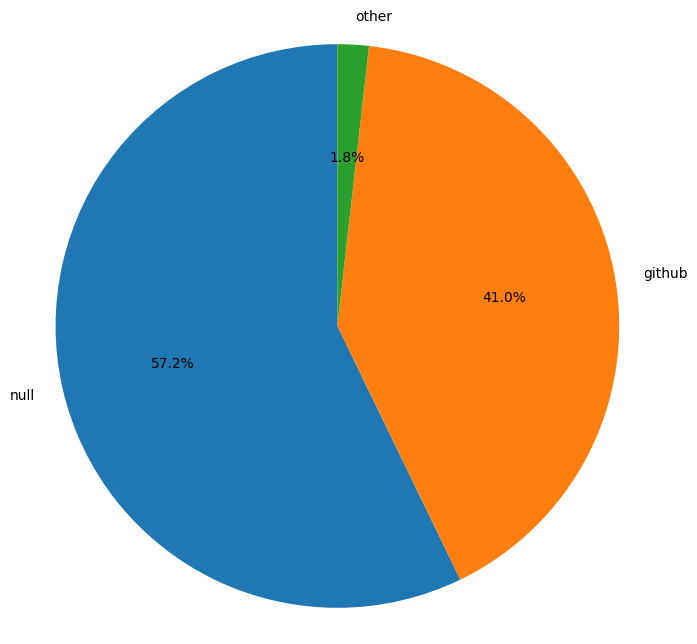

In [5]:
labels = list(lib_platform_counts.keys())
sizes = list(lib_platform_counts.values())

threshold = 100000
other_sum = sum([size for size in sizes if size < threshold])
sizes = [size if size >= threshold else 0 for size in sizes]
sizes.append(other_sum)
labels.append("other")

non_zero_sizes = [size for size in sizes if size > 0]
non_zero_labels = [label for i, label in enumerate(labels) if sizes[i] > 0]

plt.figure(figsize=(8, 8))

plt.pie(non_zero_sizes, labels=non_zero_labels, startangle=90, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()

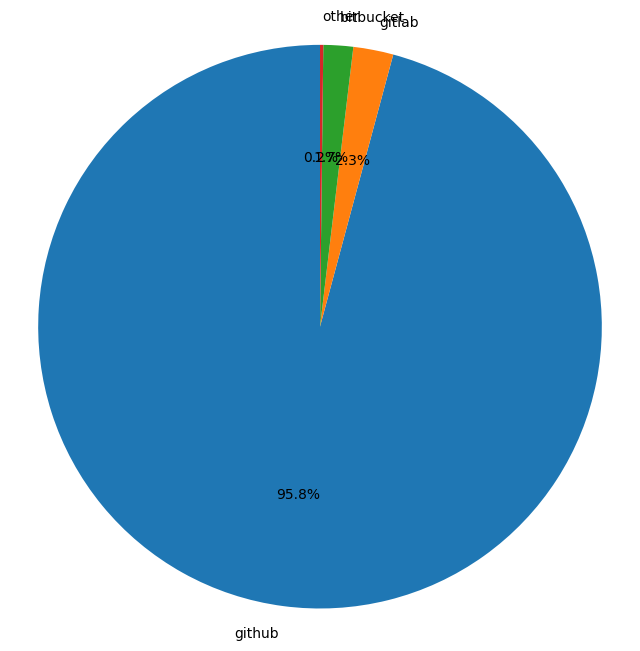

In [6]:
lib_platform_counts_remove_0 = lib_platform_counts.copy()
lib_platform_counts_remove_0['null'] = 0

labels = list(lib_platform_counts_remove_0.keys())
sizes = list(lib_platform_counts_remove_0.values())

threshold = 50000
other_sum = sum([size for size in sizes if size < threshold])
sizes = [size if size >= threshold else 0 for size in sizes]
sizes.append(other_sum)
labels.append("other")

non_zero_sizes = [size for size in sizes if size > 0]
non_zero_labels = [label for i, label in enumerate(labels) if sizes[i] > 0]

plt.figure(figsize=(8, 8))

plt.pie(non_zero_sizes, labels=non_zero_labels, startangle=90, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()

pysrc的优势, 通过request修正了重定向的URL
即

- OSSGadget找到了url, 但是py2src.ossgadget为NaN或者与OSSGadget不同

- 暂时无法统计: 与以上一点不同, py2src仅仅多了一步重定向; py2src.metadata问题在于它的keys不如Libraries.io覆盖面广, 如果keys补上, 且只统计github, 以上两点加在一起可以更好的统计重定向

In [7]:
docs = col.find()

count_OSSGadget = 0
redirect_count_OSSGadget_NaN = 0
redirect_count_OSSGadget_other = 0

for doc in docs:
    if isinstance(doc['OSSGadget'], str):
        count_OSSGadget += 1
        if not isinstance(doc['py2src.ossgadget'], str):
            redirect_count_OSSGadget_NaN += 1
        elif doc['py2src.ossgadget'] != doc['OSSGadget']:
            redirect_count_OSSGadget_other += 1
    
print(count_OSSGadget)
print(redirect_count_OSSGadget_NaN)
print(redirect_count_OSSGadget_other)

3072108
319215
312951


urllib or regular expression ?

找到的集合Set_urllib是Set_regular_expression的子集吗, 下面的代码发现居然不是!?

发现确实没有一个是对的

```
https://github.com/negative space ou/zmei

https://github.com/machu-gwu/

https://github.com/bundesapi/&lt

https://github.com/mnicolas94/***

https://github.com/uio-inf3331/inf3331-daudmo
```

绘制一个韦恩图

额, 这韦恩图画的好难看, 主要是交集的部分太大了

3065865


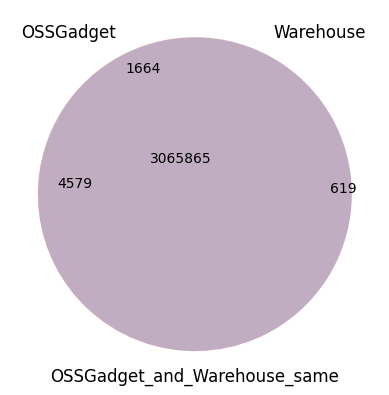

In [8]:
from matplotlib_venn import venn3
docs = col.find()

count_OSSGadget_and_Warehouse_same = 0
set_OSSGadget = set()
set_Warehouse = set()
set_OSSGadget_and_Warehouse_same = set()

for doc in docs:
    if isinstance(doc['OSSGadget'], str):
        set_OSSGadget.add(str(doc['_id']))
    if isinstance(doc['Warehouse'], str):
        set_Warehouse.add(str(doc['_id']))
    if isinstance(doc['OSSGadget'], str)\
        and isinstance(doc['Warehouse'], str)\
            and doc['OSSGadget'] == doc['Warehouse']:
        count_OSSGadget_and_Warehouse_same += 1
        set_OSSGadget_and_Warehouse_same.add(str(doc['_id']))
    
print(count_OSSGadget_and_Warehouse_same)

venn_diagram = venn3([set_OSSGadget, set_Warehouse, set_OSSGadget_and_Warehouse_same], set_labels=('OSSGadget', 'Warehouse', 'OSSGadget_and_Warehouse_same'))
# venn_diagram.get_label_by_id('100').set_text(len(set_OSSGadget - set_Warehouse - set_OSSGadget_and_Warehouse_same))
# venn_diagram.get_label_by_id('010').set_text(len(set_Warehouse - set_OSSGadget - set_OSSGadget_and_Warehouse_same))
plt.show()

Py2Src中检测出的URL，在除了OSSGadget和Warehouse的URL之外，Badge，readthedocs，homepage这三个来源检测出的URL的比例

- Badge，readthedocs，homepage非空

- Badge，readthedocs，homepage非空, 但是OSSGadget空



In [9]:
docs = col.find()

set_badge = set()
set_readthedocs = set()
set_homepage = set()

for doc in docs:
    if isinstance(doc['py2src.badge'], str):
        set_badge.add(str(doc['_id']))
    if isinstance(doc['py2src.readthedocs'], str):
        set_readthedocs.add(str(doc['_id']))
    if isinstance(doc['py2src.homepage'], str):
        set_homepage.add(str(doc['_id']))
        
print(len(set_badge))
print(len(set_readthedocs))
print(len(set_homepage))

print(len(set_badge - set_OSSGadget))
print(len(set_readthedocs - set_OSSGadget))
print(len(set_homepage - set_OSSGadget))

687211
324864
0
60954
50262
0
